In [1]:
import warnings
warnings.simplefilter(action='ignore',)

import numpy as np
import matplotlib.pyplot as plt

from qiskit import BasicAer, QuantumCircuit,execute
backend = BasicAer.get_backend("qasm_simulator")

from qiskit.visualization import plot_histogram

In [2]:
def func_1dim(mode):
    qc = QuantumCircuit(2)
    if mode == "constant": qc.x(1)
    if mode == "balanced": qc.cnot(0,1) 
    
    oracle_gate = qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

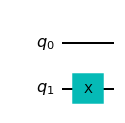

In [3]:
# constant
qc = QuantumCircuit(2)
qc.x(1)
qc.draw(output="mpl")

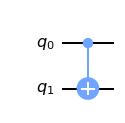

In [4]:
# balanced
qc = QuantumCircuit(2)
qc.cnot(0,1) 
qc.draw(output="mpl")

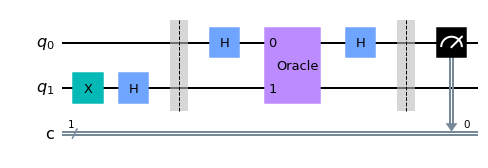

In [5]:
qc_constant = QuantumCircuit(2,1) 
oracle_constant = func_1dim("constant")

# prepare minus-qubit
qc_constant.x(1)
qc_constant.h(1)

qc_constant.barrier()

qc_constant.h(0)
qc_constant.append(oracle_constant,range(2))
qc_constant.h(0)

qc_constant.barrier()
qc_constant.measure(0,0)
qc_constant.draw(output="mpl")

#### $q_0$ returns 0 if $f$ is constant

In [6]:
result = execute(qc_constant, backend=backend,shots=1024).result()
result.get_counts()
# plot_histogram(result.get_counts())

{'0': 1024}

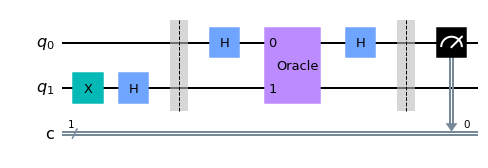

In [7]:
qc_balanced = QuantumCircuit(2,1) 
oracle_balanced = func_1dim("balanced")

# prepare minus-qubit
qc_balanced.x(1)
qc_balanced.h(1)

qc_balanced.barrier()

qc_balanced.h(0)
qc_balanced.append(oracle_balanced,range(2))
qc_balanced.h(0)

qc_balanced.barrier()
qc_balanced.measure(0,0)
qc_balanced.draw(output="mpl")

#### $q_0$ returns 1 if $f$ is balanced

In [8]:
result = execute(qc_balanced, backend=backend,shots=1024).result()
result.get_counts()
# plot_histogram(result.get_counts())

{'1': 1024}

#### Deutsch-Jozsa algorithm

In [9]:
def func(mode,n):
    qc = QuantumCircuit(n+1) # add one for minus-qubit
    
    if mode == "constant":
        output = np.random.randint(2)
        if output == 1:
            qc.x(n) # bit flip the last one  
            
    if mode == "balanced":
        for i in range(n):
            qc.cx(i,n) # control X with i (0~n-1) and the last one
    
    oracle_gate = qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [10]:
def Deutsch_Jozsa_algorithm(n, mode):    
    qc = QuantumCircuit(n+1,n) # n+1條量子電路，n條傳統電路   
    qc.h(range(n)) 
        
    # prepare minus-qubit    
    qc.x(n)
    qc.h(n) 
            
    oracle = func(mode, n)
    qc.append(oracle, range(n+1))
    
    qc.h(range(n)) 
    for i in range(n): qc.measure(i,i)    
    return qc

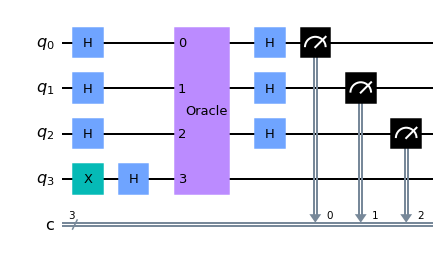

In [11]:
c_3 = Deutsch_Jozsa_algorithm(3, "constant")
c_3.draw(output="mpl")

In [12]:
result = execute(c_3, backend=backend,shots=1024).result()
result.get_counts()

{'000': 1024}

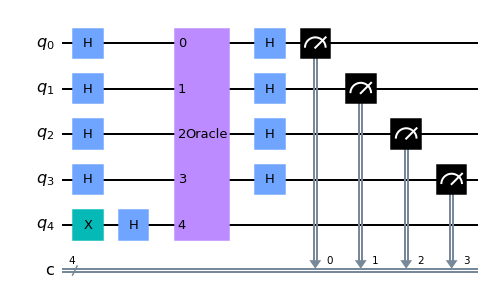

In [13]:
b_4 = Deutsch_Jozsa_algorithm(4, "balanced")
b_4.draw(output="mpl")

In [14]:
result = execute(b_4, backend=backend,shots=1024).result()
result.get_counts()

{'1111': 1024}